# Proyecto 1

# Importaciones

In [59]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn import linear_model
from sklearn import model_selection

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Carga de datos

In [60]:
data=pd.read_csv('SuicidiosProyecto.csv', sep=',', encoding = 'utf-8')
data_s=data

# Entendimiento de los datos

In [61]:
data_s.head()

,Unnamed: 0,text,class
0,173271,i want to destroy myselffor once everything wa...,suicide
1,336321,I kinda got behind schedule with learning for ...,non-suicide
2,256637,I'm just not sure anymoreFirst and foremost: I...,suicide
3,303772,please give me a reason to liveThats too much ...,suicide
4,293747,27f struggling to find meaning moving forwardI...,suicide


In [62]:
data_s.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

In [63]:
data_s.describe()

,Unnamed: 0
count,195700.000000
mean,174189.921344
std,100467.436608
min,2.000000
25%,87099.750000
50%,174426.500000
75%,261247.250000
max,348110.000000


In [64]:
data_s.shape

(195700, 3)

In [65]:
data_s["class"].value_counts()

non-suicide    110165
suicide         85535
Name: class, dtype: int64

# Limpieza de los datos

In [66]:
data_s["class"] = data_s["class"].replace({'suicide':1, 'non-suicide':0})

In [67]:
X, y = data_s['text'], data_s['class']

In [68]:
print(X)

0         i want to destroy myselffor once everything wa...
1         I kinda got behind schedule with learning for ...
2         I'm just not sure anymoreFirst and foremost: I...
3         please give me a reason to liveThats too much ...
4         27f struggling to find meaning moving forwardI...
                                ...                        
195695    Drop some cool new cereal ideas Like what woul...
195696    Unpopular opinion but cats deserve love and re...
195697                           Hey guys :) How yall doin?
195698    uhm I covered my dog in a blanket because the ...
195699    ____god. how do i do it. how do i end my life....
Name: text, Length: 195700, dtype: object


In [69]:
print(type(X))

<class 'pandas.core.series.Series'>


In [70]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split(' ')

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

X = pd.DataFrame(documents)


KeyboardInterrupt: 

In [ ]:
print(X)

0         i want to destroy myselffor once everything wa...
1         i kinda got behind schedule with learning for ...
2         i just not sure anymorefirst and foremost m fr...
3         please give me reason to livethats too much fo...
4         27f struggling to find meaning moving forwardi...
                                ...                        
195695    drop some cool new cereal idea like what would...
195696    unpopular opinion but cat deserve love and res...
195697                               hey guy how yall doin 
195698    uhm covered my dog in blanket because the ligh...
195699    ____god how do do it how do end my life am so ...
Length: 195700, dtype: object


In [ ]:
X.describe

dtype('O')

In [ ]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

ValueError: could not convert string to float: 'i want to destroy myselffor once everything wa starting to feel okay again but it all came tumbling down and don know how used to cope before and the only reason m not tearing my skin to shred and swallowing every pill can find right now is because m not alone in the room but my wall are slowly falling down and it only matter of time before snap and finally end it once and for all '

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Implementación algoritmos 

## MultinomialNB


In [ ]:
m = MultinomialNB()
m.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred= m.predict(X_test)

print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

Exactitud: 0.89
Recall: 0.9058017680463674
Precisión: 0.8513729158641942
Puntuación F1: 0.8777443694332558


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     22059
           1       0.85      0.91      0.88     17081

    accuracy                           0.89     39140
   macro avg       0.89      0.89      0.89     39140
weighted avg       0.89      0.89      0.89     39140



## GaussianNB


In [ ]:
g = GaussianNB()
g.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred= g.predict(X_test)

print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

Exactitud: 0.85
Recall: 0.901352379837246
Precisión: 0.7940584867708494
Puntuación F1: 0.8443103921030984


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     22059
           1       0.79      0.90      0.84     17081

    accuracy                           0.85     39140
   macro avg       0.85      0.86      0.85     39140
weighted avg       0.86      0.85      0.86     39140



## Regresión Logística


In [ ]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
#Cuan bueno fue nuestro modelo
model.score(X_train,y_train)

0.9279381706693919

In [ ]:
y_pred = model.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

Exactitud: 0.92
Recall: 0.8959662783209414
Precisión: 0.9253839642036522
Puntuación F1: 0.9104375501948304


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     22059
           1       0.93      0.90      0.91     17081

    accuracy                           0.92     39140
   macro avg       0.92      0.92      0.92     39140
weighted avg       0.92      0.92      0.92     39140



c:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


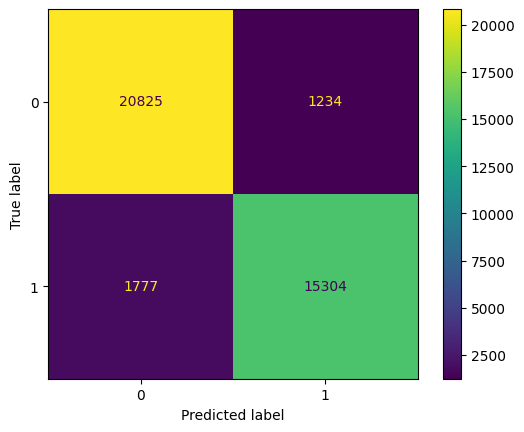

In [ ]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()  

# Creación de Pipeline

In [ ]:
data_preprocessor = ColumnTransformer(transformers = [('', TfidfTransformer(), ['text'])])

model = [('model', linear_model.LogisticRegression())]
pipeline = Pipeline(model)

In [ ]:
pipeline = pipeline.fit(X,y)

# Prediccion datos sin etiqueta

## Carga de datos sin etiqueta

In [ ]:
data_SE=pd.read_csv('SuicidiosProyectoSinEtiqueta.csv', sep=',', encoding = 'utf-8')
data_SE_P=data_SE

In [ ]:
data_SE_P.head()

,Unnamed: 0,text
0,66529,"Suicide Thoughts Getting StrongerOK, since the..."
1,293637,"Guys, I just asked my crush... if she wanted t..."
2,198884,I'm going to kill myselfOf course I'm not but ...
3,186897,I did it! I slept facing the wall.\n\nOverall ...
4,89024,I don't want to be dead...I want to be alive a...


## Limpieza de datos sin etiqueta

In [ ]:
XP = data_SE_P['text']

In [ ]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(XP)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(XP[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split(' ')

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [ ]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
XP = vectorizer.fit_transform(documents).toarray()

In [ ]:
tfidfconverter = TfidfTransformer()
XP = tfidfconverter.fit_transform(XP).toarray()

## Prediccion

In [ ]:
data_SE_P['class'] = pipeline.predict(XP)
data_SE_P["class"] = data_SE_P["class"].replace({1:'suicide', 0:'non-suicide'})

In [ ]:
data_SE_P.head()

,Unnamed: 0,text,class
0,66529,"Suicide Thoughts Getting StrongerOK, since the...",suicide
1,293637,"Guys, I just asked my crush... if she wanted t...",non-suicide
2,198884,I'm going to kill myselfOf course I'm not but ...,non-suicide
3,186897,I did it! I slept facing the wall.\n\nOverall ...,non-suicide
4,89024,I don't want to be dead...I want to be alive a...,non-suicide


In [ ]:
data_SE_P["class"].value_counts()

non-suicide    7687
suicide        2613
Name: class, dtype: int64